<a href="https://colab.research.google.com/github/Moooooonk/AI-from-basic/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%A0%EA%B2%BD%EB%A7%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비
from tensorflow.keras.datasets import fashion_mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 정규화 (0~1 사이 값으로 변환)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 학습 데이터를 학습, 검증 세트로 분할
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 2. 모델 구축
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),  # 입력 레이어
    Dense(128, activation='relu'),  # 첫 번째 은닉층
    Dense(64, activation='relu'),   # 두 번째 은닉층
    Dense(10, activation='softmax') # 출력 레이어 (10개 클래스)
])

# 3. 모델 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

# 4. 은닉층 활성화 시각화
from tensorflow.keras.models import Model

# 첫 번째 은닉층의 출력을 얻는 모델 생성
layer_outputs = [layer.output for layer in model.layers[:3]]  # Flatten 포함
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# 테스트 샘플 이미지 선택
sample_image = np.expand_dims(x_test[0], axis=0)  # 차원 확장
activations = activation_model.predict(sample_image)

# 활성화 맵 시각화
layer_names = ["Flatten", "Dense1 (ReLU)", "Dense2 (ReLU)"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(x_test[0], cmap='gray')
axes[0].set_title("Original Image")

for i, activation in enumerate(activations[1:]):
    axes[i+1].imshow(activation[0].reshape(-1, 8), cmap='viridis')  # 히트맵 시각화
    axes[i+1].set_title(layer_names[i+1])

plt.show()

# 5. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"테스트 정확도: {test_acc:.4f}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7693 - loss: 0.6686 - val_accuracy: 0.8497 - val_loss: 0.4178
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8557 - loss: 0.3914 - val_accuracy: 0.8663 - val_loss: 0.3664
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8725 - loss: 0.3433 - val_accuracy: 0.8595 - val_loss: 0.3797
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8805 - loss: 0.3225 - val_accuracy: 0.8783 - val_loss: 0.3283
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8890 - loss: 0.3007 - val_accuracy: 0.8783 - val_loss: 0.3429
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8947 - loss: 0.2832 - val_accuracy: 0.8832 - val_loss: 0.3284
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9004 - loss: 0.2712 - val_accuracy: 0.8834 - val_loss: 0.3285
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9037 - loss: 0.2554

AttributeError: The layer sequential has never been called and thus has no defined input.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7665 - loss: 0.6617 - val_accuracy: 0.8536 - val_loss: 0.4035
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8594 - loss: 0.3853 - val_accuracy: 0.8577 - val_loss: 0.3855
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8729 - loss: 0.3412 - val_accuracy: 0.8733 - val_loss: 0.3535
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8811 - loss: 0.3248 - val_accuracy: 0.8645 - val_loss: 0.3694
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8887 - loss: 0.2992 - val_accuracy: 0.8792 - val_loss: 0.3341
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8938 - loss: 0.2830 - val_accuracy: 0.8758 - val_loss: 0.3442
Epoch 7/10
1500/1500 ━━━━

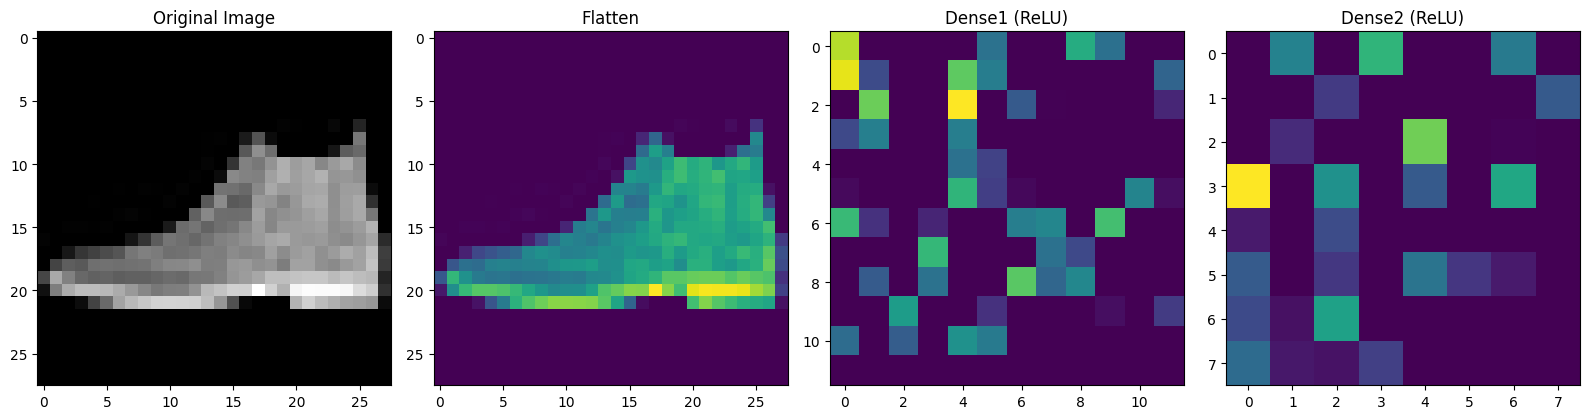

313/313 - 1s - 2ms/step - accuracy: 0.8725 - loss: 0.3907
테스트 정확도: 0.8725


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 준비
from tensorflow.keras.datasets import fashion_mnist

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 정규화 (0~1 사이 값으로 변환)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 학습 데이터를 학습, 검증 세트로 분할
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 2. 모델 구축
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Input

# 입력 레이어를 명시적으로 정의
inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# 함수형 API를 사용하여 모델 생성
model = Model(inputs=inputs, outputs=outputs)

# 3. 모델 학습
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_val, y_val))

# 4. 은닉층 활성화 시각화
# 각 레이어의 출력을 얻는 모델 생성
layer1_output = model.layers[1].output  # Flatten 출력
layer2_output = model.layers[2].output  # 첫 번째 Dense 출력
layer3_output = model.layers[3].output  # 두 번째 Dense 출력

activation_model = Model(inputs=model.input, outputs=[layer1_output, layer2_output, layer3_output])

# 테스트 샘플 이미지 선택
sample_image = np.expand_dims(x_test[0], axis=0)  # 차원 확장
activations = activation_model.predict(sample_image)

# 활성화 맵 시각화
layer_names = ["Flatten", "Dense1 (ReLU)", "Dense2 (ReLU)"]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(x_test[0], cmap='gray')
axes[0].set_title("Original Image")

for i, activation in enumerate(activations):
    # 적절한 시각화 모양으로 변환
    if i == 0:  # Flatten 레이어는 1D이므로 reshape이 필요
        reshape_size = int(np.sqrt(activation.shape[1]))
        display_activation = activation[0][:reshape_size**2].reshape(reshape_size, reshape_size)
    else:
        # Dense 레이어는 적절한 정사각형 형태로 시각화
        reshape_size = int(np.ceil(np.sqrt(activation.shape[1])))
        padding = reshape_size**2 - activation.shape[1]
        padded_activation = np.pad(activation[0], (0, padding), 'constant')
        display_activation = padded_activation.reshape(reshape_size, reshape_size)

    axes[i+1].imshow(display_activation, cmap='viridis')
    axes[i+1].set_title(layer_names[i])

plt.tight_layout()
plt.show()

# 5. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"테스트 정확도: {test_acc:.4f}")